In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r"D:\CSE445\PHFood_Brazil.csv", low_memory=False)

# Displaying the first few rows of the dataset to check
df.head()

,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values in each column:
Year                             0
Food                             0
Food (English)                   0
Region                           0
State                            0
Harvest Area (hectares)          0
Food Production (tons)           0
Energy (kcal)                    0
Protein (g)                      0
Lipids (g)                       0
Carbohydrates (g)                0
Fiber (g)                        0
Calcium (mg)                     0
Magnesium (mg)                   0
Manganese (mg)                   0
Phosphorus (mg)                  0
Iron (mg)                        0
Potassium (mg)                   0
Copper (mg)                      0
Zinc (mg)                        0
Selenium (mcg)                   0
Retinol (mcg)                    0
Vitamin A (mcg)                  0
Vitamin B1 (mg)                  0
Vitamin B2 (mg)                  0
Vitamin B3 (mg)                  0
Equivalent Vitamin B3 (mg)       0
Vitamin B6 (mg)         

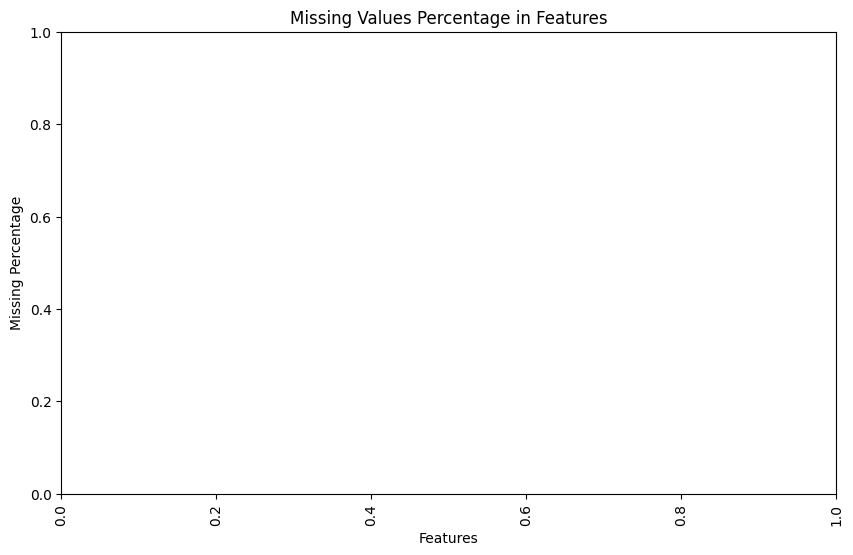

In [66]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Check for missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage in Features")

# Annotate the bars with percentages
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [70]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Display all column names
print(df.columns)

Index(['Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Retinol (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'Water Need',
       'Water Use', 'Water Deficit', 'Water Deficit Percentage', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Class', 'Organic',
       'Toxic Class', 'Environmental Impact', 'Authorized',
       'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)',
       'Residue Percentage', 'Food Acquisition (kg)', 'Food Group (FG)',
       'Population Food Group', 'Bean Intake (Food Group)',
       'Vegeta

In [73]:
# List of columns to drop
columns_to_drop = ["Year", "Region", "State", "Harvest Area (hectares)", "Food Production (tons)", "CODE", "Commercial pesticide name", "Pesticide","Organic", "Toxic Class","Environmental Impact", "Food","Food Group (FG)", "Food (English)"] 

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Check remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439299 entries, 0 to 439298
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Energy (kcal)                  439299 non-null  float64
 1   Protein (g)                    439299 non-null  float64
 2   Lipids (g)                     439299 non-null  float64
 3   Carbohydrates (g)              439299 non-null  float64
 4   Fiber (g)                      439299 non-null  float64
 5   Calcium (mg)                   439299 non-null  float64
 6   Magnesium (mg)                 439299 non-null  float64
 7   Manganese (mg)                 439299 non-null  float64
 8   Phosphorus (mg)                439299 non-null  float64
 9   Iron (mg)                      439299 non-null  float64
 10  Potassium (mg)                 439299 non-null  float64
 11  Copper (mg)                    439299 non-null  float64
 12  Zinc (mg)                     

In [74]:
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Fill categorical columns with mode — only if such columns exist
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

# Checking summary statistics to identify scaling needs
df.describe()


,Energy (kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),Calcium (mg),Magnesium (mg),Manganese (mg),Phosphorus (mg),Iron (mg),...,Water Deficit Percentage,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group),healthy,health_score
count,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,...,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,439299.000000,4.392990e+05
mean,1.702954e+12,5.491202e+10,5.171598e+10,2.951138e+11,3.292349e+10,3.425900e+11,3.747772e+11,3.704642e+09,9.562613e+11,1.573650e+10,...,26.984596,0.220617,0.024273,79.234471,0.800951,5375.823086,3912.310948,4146.572002,0.267911,2.295026e+11
std,1.192108e+13,3.347019e+11,2.649330e+11,3.005522e+12,1.540603e+11,2.187856e+12,1.960708e+12,2.299068e+10,5.215517e+12,1.028906e+11,...,15.592310,0.981180,0.040450,14.446611,1.716729,9065.858179,3149.505287,5097.446907,0.442871,1.613930e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.002000,0.000200,0.000000,0.001000,1.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,5.940000e+07,1.712500e+06,3.080000e+05,1.258190e+07,3.125000e+06,1.952987e+07,2.500000e+07,1.848000e+05,3.618808e+07,4.148000e+05,...,25.699120,0.100000,0.020000,81.250000,0.502000,4283.000000,3771.000000,3771.000000,0.000000,1.757099e+09
50%,1.320042e+10,3.091297e+08,1.194831e+08,2.432425e+09,4.071340e+08,2.541489e+09,4.212443e+09,3.445440e+07,6.063750e+09,8.299460e+07,...,25.699120,0.100000,0.020000,81.250000,0.502000,4283.000000,3771.000000,3771.000000,0.000000,2.225521e+09
75%,1.343731e+11,2.954086e+09,2.085573e+09,2.498664e+10,3.584347e+09,2.793276e+10,3.900750e+10,3.587973e+08,6.368183e+10,7.955622e+08,...,25.699120,0.100000,0.020000,81.250000,0.502000,4283.000000,3771.000000,3771.000000,1.000000,3.058126e+09
max,3.314224e+14,6.327424e+12,4.415128e+12,8.994979e+13,2.281523e+12,3.878589e+13,3.270183e+13,6.094993e+11,9.316220e+13,1.954885e+12,...,498.436753,25.000000,0.500000,100.000000,49.580000,283351.000000,283351.000000,283351.000000,1.000000,5.007940e+13


In [75]:
import pandas as pd

# Selecting only numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Finding correlation matrix
corr_matrix = numeric_df.corr().abs()

# Extract upper triangle of correlation matrix to remove duplicates
upper_tri = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape), k=0).astype(bool))

# Finding highly correlated features (above 0.85)
high_corr_features = upper_tri.stack().reset_index()
high_corr_features.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Display highly correlated features
print("Highly Correlated Features (above 0.85):\n", high_corr_features[high_corr_features['Correlation'] > 0.85])

Highly Correlated Features (above 0.85):
                       Feature 1          Feature 2  Correlation
2                 Energy (kcal)  Carbohydrates (g)     0.959174
35                  Protein (g)         Lipids (g)     0.937778
37                  Protein (g)          Fiber (g)     0.865639
38                  Protein (g)       Calcium (mg)     0.908725
39                  Protein (g)     Magnesium (mg)     0.917560
..                          ...                ...          ...
495  Equivalent Vitamin B3 (mg)       Folate (mcg)     0.941063
509  Equivalent Vitamin B3 (mg)       health_score     0.896131
510             Vitamin B6 (mg)       Folate (mcg)     0.862931
524             Vitamin B6 (mg)       health_score     0.911231
552                  Water Need          Water Use     0.971024

[102 rows x 3 columns]


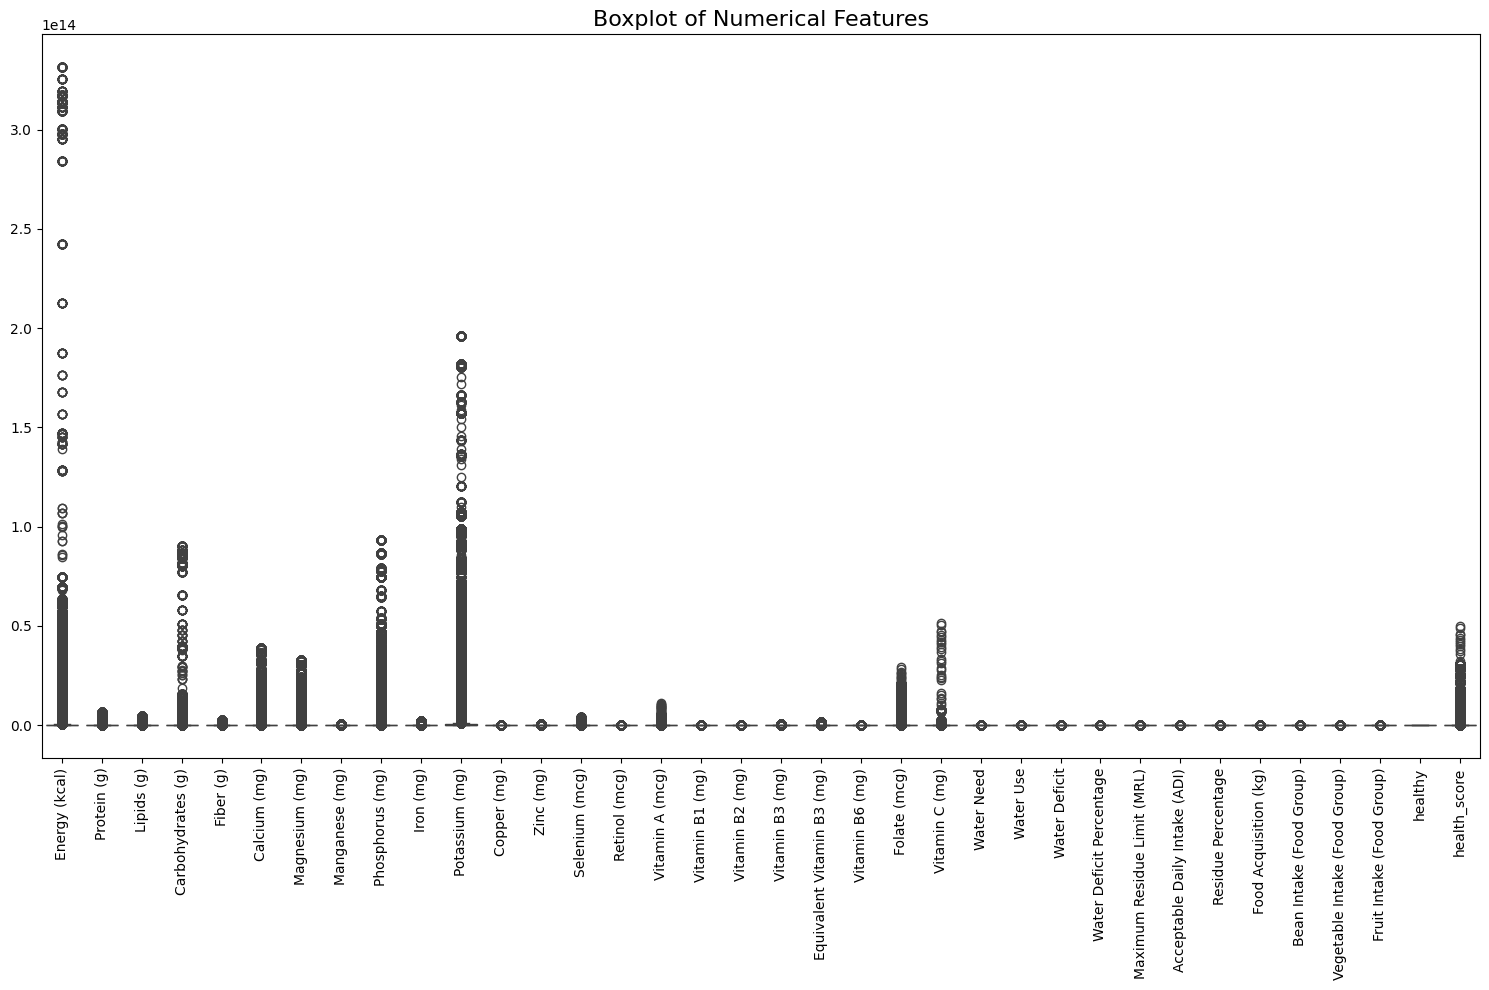

In [76]:
# Summary statistics for numerical columns
df.describe()

# Data distribution for numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Boxplot for numerical columns to check for spread and any potential outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns], orient="v")
plt.title('Boxplot of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [12]:
# Compute Q1, Q3, and IQR for numerical columns
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers_iqr = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

print("\nNumber of Outliers Detected by IQR Method:")
print(outliers_iqr)



Number of Outliers Detected by IQR Method:
Energy (kcal)                 81123
Protein (g)                   84322
Lipids (g)                    82879
Carbohydrates (g)             78737
Fiber (g)                     83056
Calcium (mg)                  73681
Magnesium (mg)                80781
Manganese (mg)                79407
Phosphorus (mg)               83125
Iron (mg)                     82429
Potassium (mg)                75221
Copper (mg)                   76400
Zinc (mg)                     82717
Selenium (mcg)                35482
Vitamin A (mcg)               23701
Vitamin B1 (mg)               77081
Vitamin B2 (mg)               94241
Vitamin B3 (mg)               97672
Equivalent Vitamin B3 (mg)    91699
Vitamin B6 (mg)               79096
Folate (mcg)                  35446
Vitamin C (mg)                21765
dtype: int64


In [13]:
# Remove outliers using IQR method
df_no_outliers_iqr = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show dataset shape changes
rows_removed = df.shape[0] - df_no_outliers_iqr.shape[0]
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after removing outliers (IQR method): {df_no_outliers_iqr.shape}")
print(f"Total rows removed: {rows_removed}")


Original shape: (439299, 22)
Shape after removing outliers (IQR method): (291761, 22)
Total rows removed: 147538


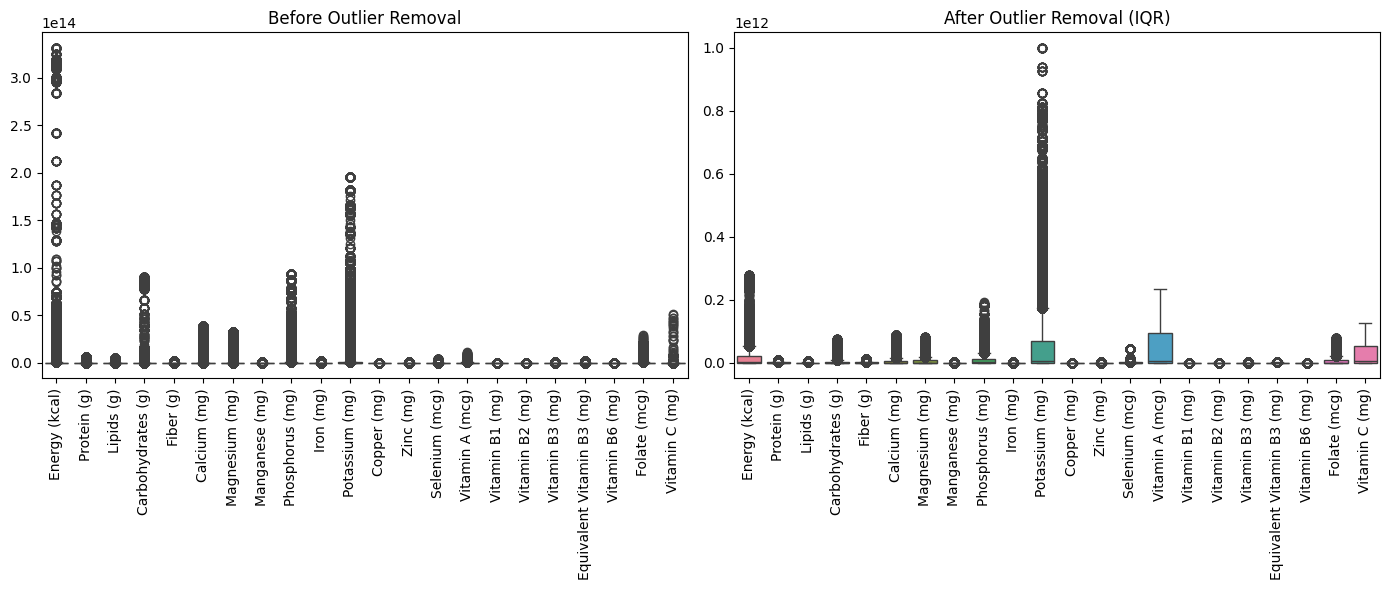

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns again to avoid issues
numeric_cols = df.select_dtypes(include=['number']).columns

# Adjust figure size for better visualization
plt.figure(figsize=(14, 6))

# Before Outlier Removal
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title('Before Outlier Removal')

# After Outlier Removal
plt.subplot(1, 2, 2)
sns.boxplot(data=df_no_outliers_iqr[numeric_cols])
plt.xticks(rotation=90)
plt.title('After Outlier Removal (IQR)')

plt.tight_layout()
plt.show()

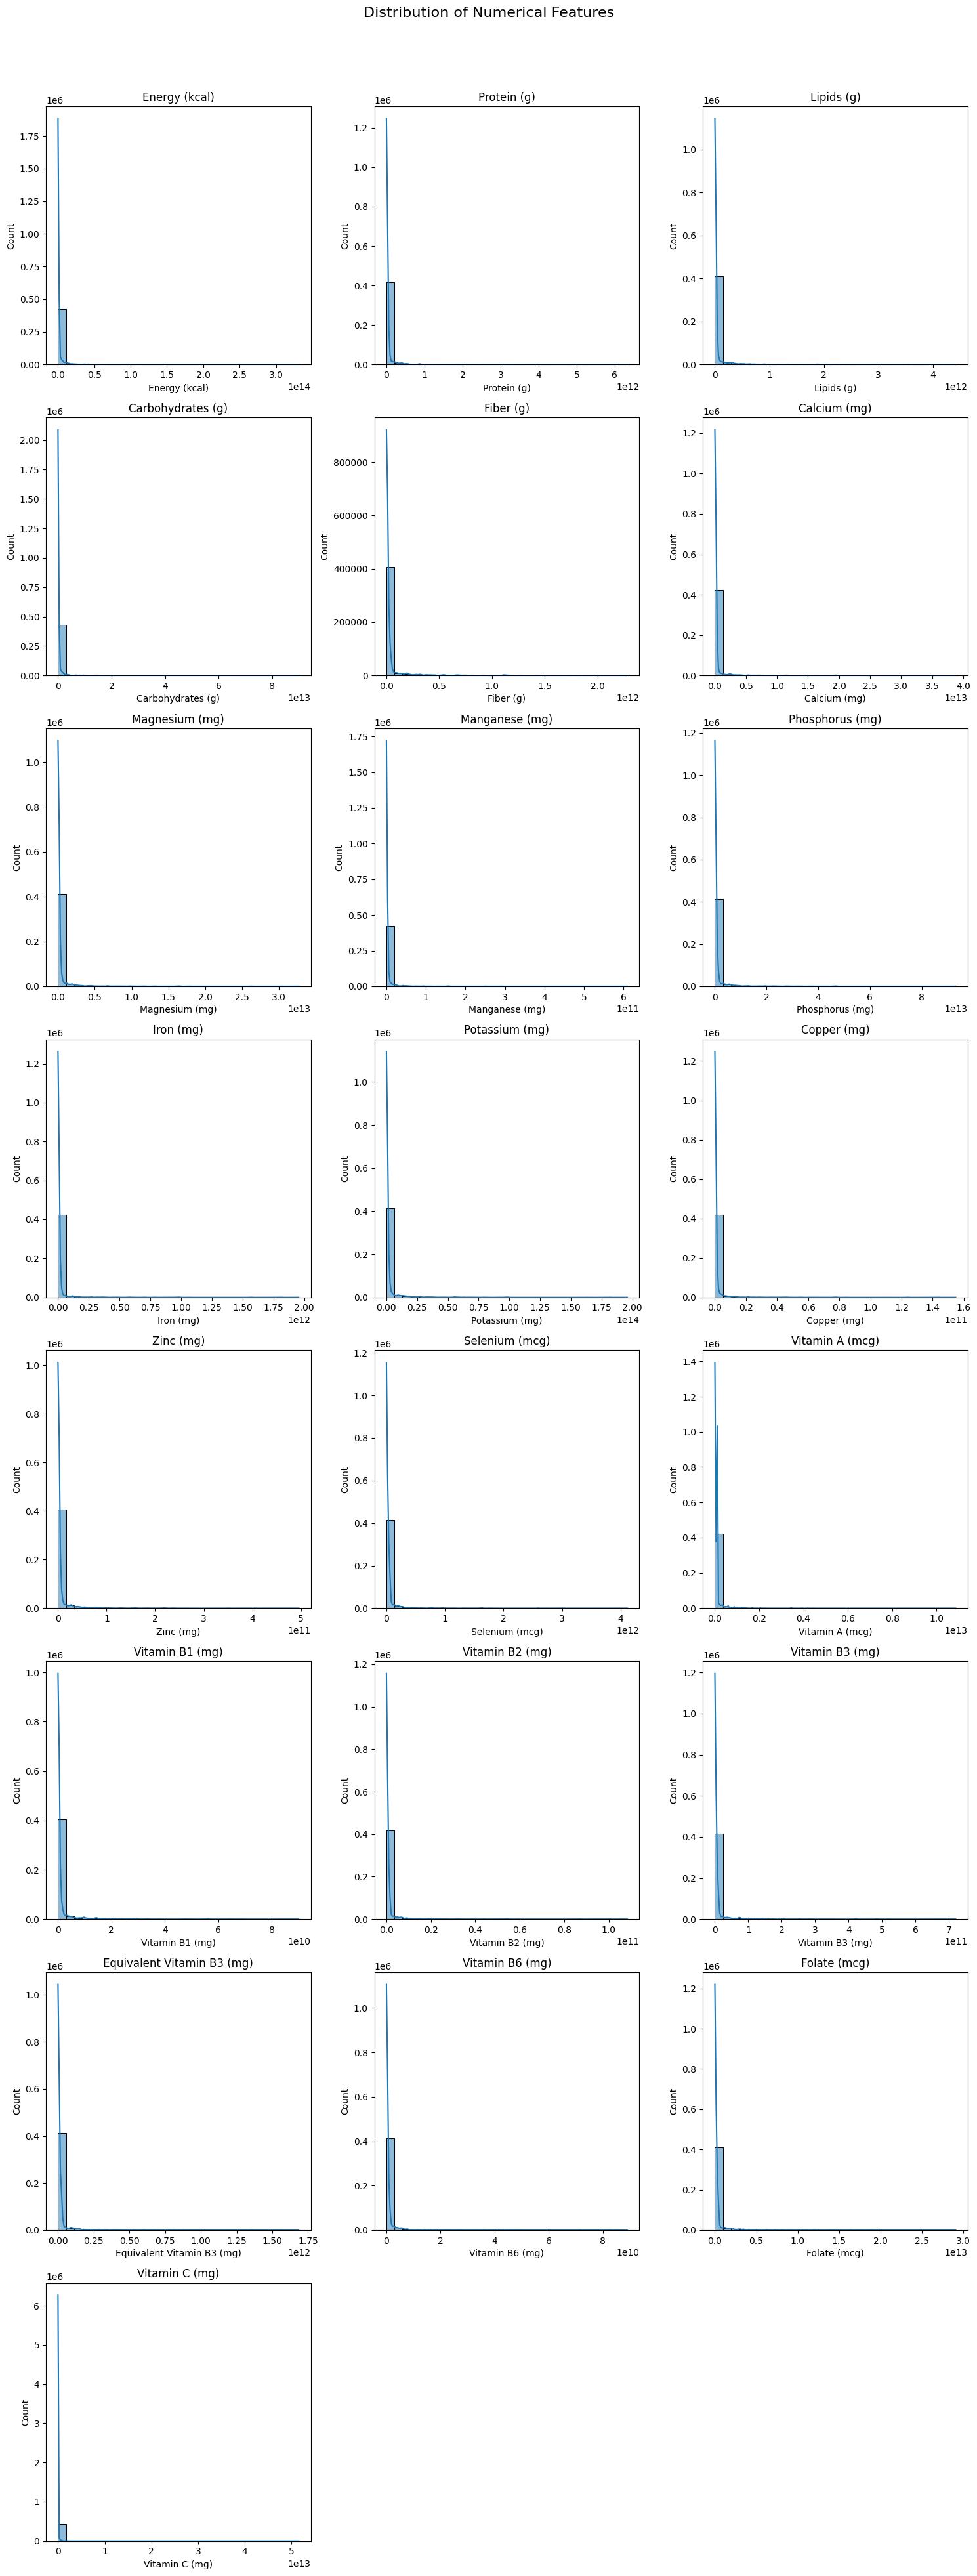

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Determine grid size for subplots
num_features = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = -(-num_features // cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot histograms with KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

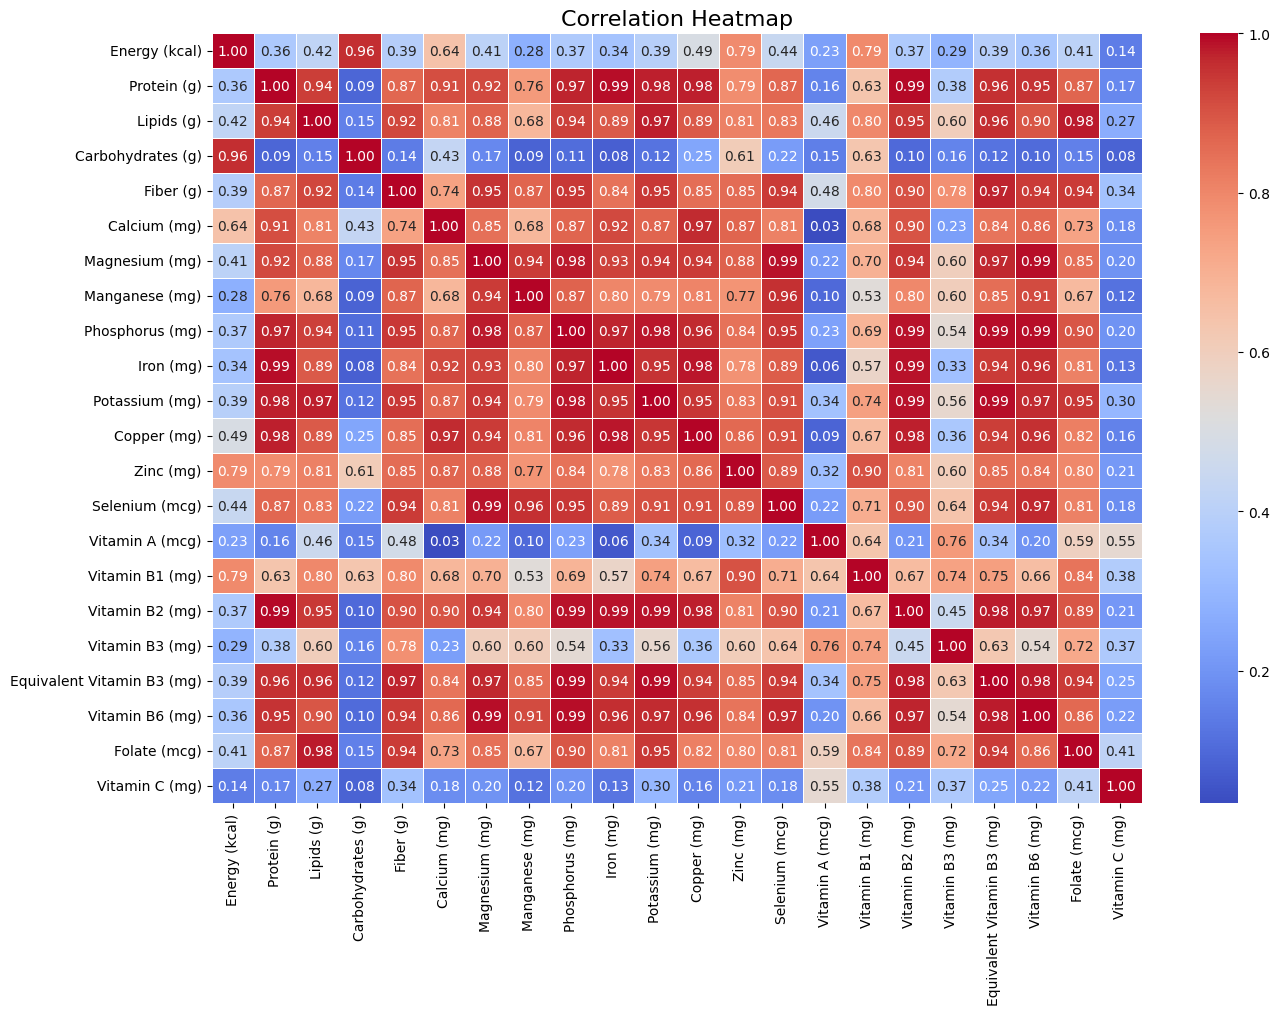

In [16]:
# Correlation heatmap for numerical features
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

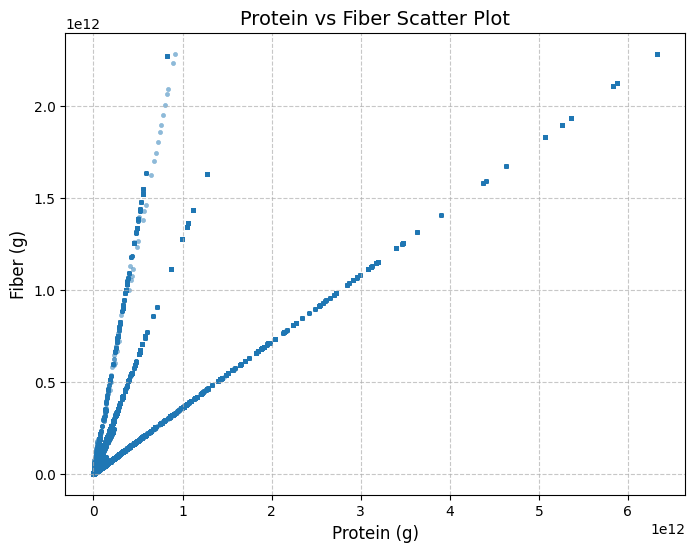

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Protein (g)", y="Fiber (g)", alpha=0.5, s=10, edgecolor=None)  # Transparency & smaller points

plt.title("Protein vs Fiber Scatter Plot", fontsize=14)
plt.xlabel("Protein (g)", fontsize=12)
plt.ylabel("Fiber (g)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)  # Add grid for better readability
plt.show()

In [46]:
# Model Training and Evaluation

# Creating target variable column if not already present
df["healthy"] = df["Energy (kcal)"] < 250  # Initial rule-based labeling
df["healthy"] = df["healthy"].astype(int)

# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +            # More protein = better
    df["Fiber (g)"] * 1.5 +            # Fiber is also good
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -             # Fats and carbs reduce score
    df["Carbohydrates (g)"] * 0.5
)

# Classify as healthy if above median health score
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)

# Foods above the median score → healthy = 1
# Foods below the median score → healthy = 0


In [19]:
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(columns=["health_score", "healthy"])  # Features
y = df["healthy"]  # Target variable

# Split into 80% training and 20% testing with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (351439, 22)
Testing set size: (87860, 22)


In [20]:
#checking if categorical column exist
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: []


In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding only if categorical columns exist
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # ✅ Fixed parameter
    ],
    remainder='passthrough'
)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert back to DataFrame to retain column names
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print("✅ One-Hot Encoding Applied Successfully!")

✅ One-Hot Encoding Applied Successfully!


In [22]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert back to DataFrame after scaling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns, index=X_test.index)

print("✅ Feature Normalization Applied Successfully!")

✅ Feature Normalization Applied Successfully!


🔹 Model Accuracy: 0.9918
🔹 Precision: 0.9936
🔹 Recall: 0.9899
🔹 F1 Score: 0.9917


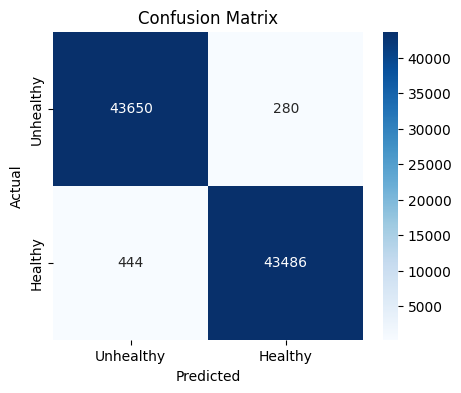

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model
model = LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced')  # ✅ Fix solver & balance classes
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # ✅ Dynamically get class labels

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Scores
print(f"🔹 Model Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"], cbar=True)  # ✅ Fix labels & add color bar
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

🔹 Model Accuracy: 0.9999
🔹 Precision: 1.0000
🔹 Recall: 0.9999
🔹 F1 Score: 0.9999


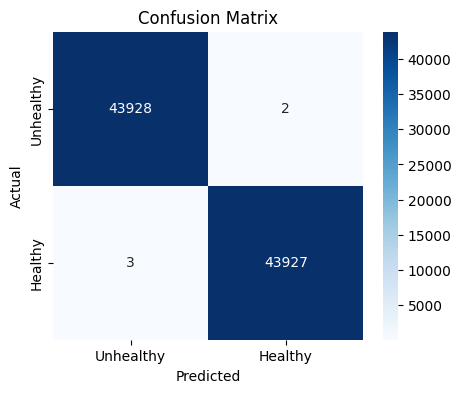

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters like max_depth
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print Scores
print(f"🔹 Model Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")


# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Unhealthy", "Healthy"], yticklabels=["Unhealthy", "Healthy"], cbar=True)  # ✅ Fix labels & add color bar
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],             # Regularization type
    'solver': ['liblinear'],       # Solver
    'max_iter': [500]              # Maximum iterations
}

# Initialize Logistic Regression with balanced class weights
model_lr = LogisticRegression(class_weight='balanced')

# GridSearchCV setup
grid_search_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_grid_lr,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit to scaled training data
grid_search_lr.fit(X_train_scaled, y_train)

# Best model and predictions
best_model_lr = grid_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test_scaled)

# Print results
print(f"✅ Best Parameters: {grid_search_lr.best_params_}")
print(f"✅ Best CV Accuracy: {grid_search_lr.best_score_:.4f}")
print(f"🔹 Test Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"🔹 Test Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"🔹 Test Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"🔹 Test F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
✅ Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best CV Accuracy: 0.9990
🔹 Test Accuracy: 0.9988
🔹 Test Precision: 0.9992
🔹 Test Recall: 0.9984
🔹 Test F1 Score: 0.9988

🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43930
           1       1.00      1.00      1.00     43930

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],  # Limit tree depth
    'min_samples_split': [10, 20],    # Minimum samples to split
    'min_samples_leaf': [5, 10]       # Minimum samples per leaf
}

# GridSearch for Decision Tree
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit on scaled training data
grid_search_dt.fit(X_train_scaled, y_train)

# Best model and prediction
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Print results
print(f"✅ Best Parameters: {grid_search_dt.best_params_}")
print(f"✅ Best CV Accuracy: {grid_search_dt.best_score_:.4f}")

# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print results
print(f"🔹 Test Accuracy: {accuracy_dt:.4f}")
print(f"🔹 Test Precision: {precision_dt:.4f}")
print(f"🔹 Test Recall: {recall_dt:.4f}")
print(f"🔹 Test F1 Score: {f1_dt:.4f}")
print("\n🔍 Classification Report:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
✅ Best CV Accuracy: 0.9999
🔹 Test Accuracy: 0.9999
🔹 Test Precision: 1.0000
🔹 Test Recall: 0.9999
🔹 Test F1 Score: 0.9999

🔍 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43930
           1       1.00      1.00      1.00     43930

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [27]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores_lr = cross_val_score(best_model_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"🔹 Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")

# Cross-validation for Decision Tree
cv_scores_dt = cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"🔹 Decision Tree CV Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

🔹 Logistic Regression CV Accuracy: 0.9990 ± 0.0001
🔹 Decision Tree CV Accuracy: 0.9999 ± 0.0000


In [28]:
from sklearn.model_selection import cross_val_score

# Logistic Regression example
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Scores: {cv_scores}")
print(f"Average CV Accuracy: {cv_scores.mean():.4f}")


Cross-validation Scores: [0.99144947 0.99095151 0.99080924 0.98992716 0.99115057]
Average CV Accuracy: 0.9909


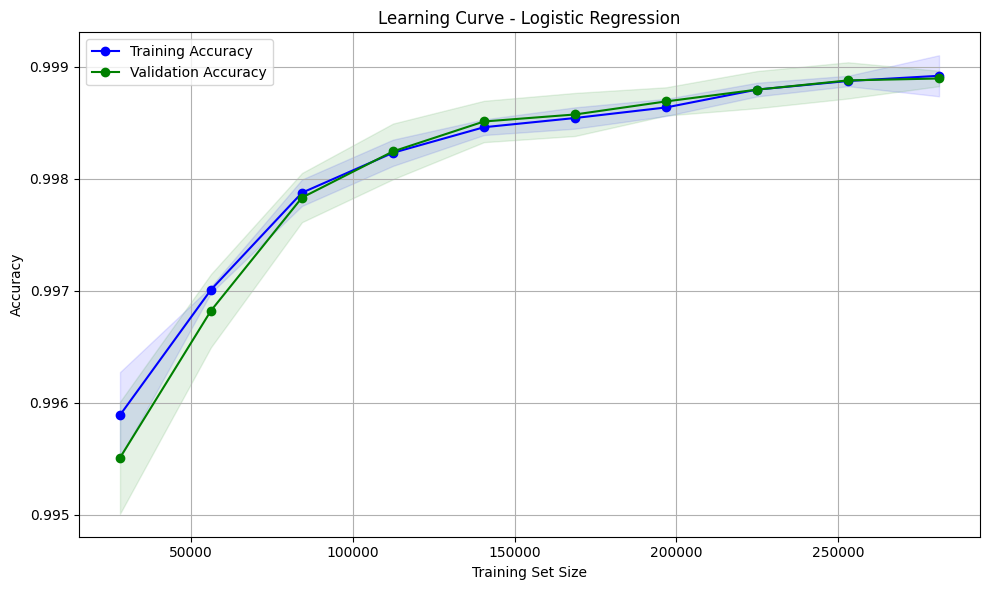

In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model_lr,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Calculate mean and std
train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


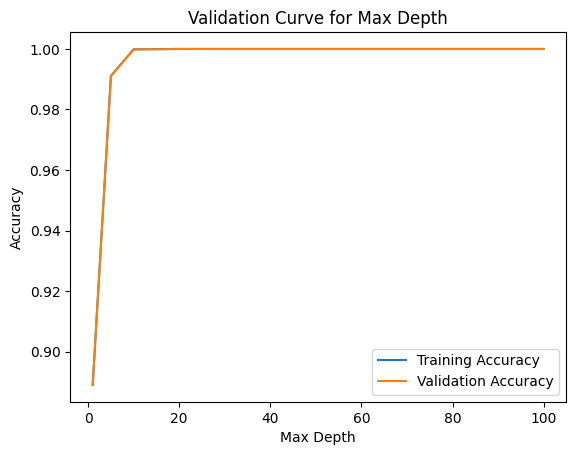

In [30]:
from sklearn.model_selection import validation_curve

param_range = [1, 5, 10, 20, 50, 100]
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train_encoded, y_train,
    param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
)

plt.plot(param_range, train_scores.mean(axis=1), label="Training Accuracy")
plt.plot(param_range, val_scores.mean(axis=1), label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation Curve for Max Depth")
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'ccp_alpha': [0.0, 0.001, 0.01, 0.1]
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search_dt.fit(X_train_encoded, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_encoded)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [32]:
from sklearn.metrics import classification_report

print("✅ Best Params:", grid_search_dt.best_params_)
print("🔹 Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


✅ Best Params: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10}
🔹 Test Accuracy: 0.9999089460505349

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     43930
           1       1.00      1.00      1.00     43930

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



Dataset Shape: (439299, 52)
   Unnamed: 0  Year      Food Food (English)   Region             State  \
0           1  1974   ABACATE        AVOCADO  MIDWEST  DISTRITO FEDERAL   
1           2  1974   ABACAXI      PINEAPPLE  MIDWEST  DISTRITO FEDERAL   
2           3  1974      ALHO         GARLIC  MIDWEST  DISTRITO FEDERAL   
3           4  1974  AMENDOIM         PEANUT  MIDWEST  DISTRITO FEDERAL   
4           5  1974     ARROZ           RICE  MIDWEST  DISTRITO FEDERAL   

   Harvest Area (hectares)  Food Production (tons)  Energy (kcal)  \
0                     56.0                  1176.0   1.411200e+09   
1                     58.0                   139.0   6.672000e+07   
2                      2.0                     3.0   4.470000e+06   
3                     25.0                    21.0   1.190700e+08   
4                    900.0                   864.0   1.131370e+09   

    Protein (g)  ...  Authorized  Maximum Residue Limit (MRL)  \
0  2.622480e+07  ...         NaN         

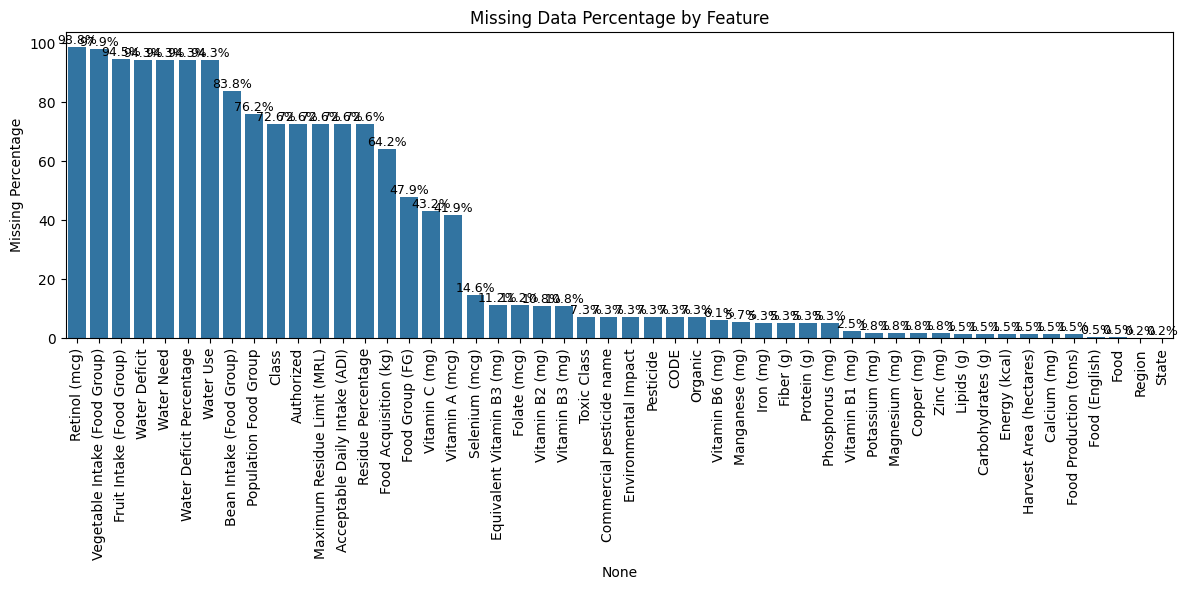

In [33]:
#1. Shape & Missing Value Summary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"D:\CSE445\PHFood_Brazil.csv", low_memory=False)

# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Display first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into one DataFrame
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percentage
})

# Show columns with missing values
print(missing_df[missing_df['Missing Values'] > 0])

# Plot missing values (if any)
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentage[missing_percentage > 0].index,
            y=missing_percentage[missing_percentage > 0].values)
plt.xticks(rotation=90)
plt.ylabel('Missing Percentage')
plt.title('Missing Data Percentage by Feature')

# Annotate bars
for i, value in enumerate(missing_percentage[missing_percentage > 0].values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


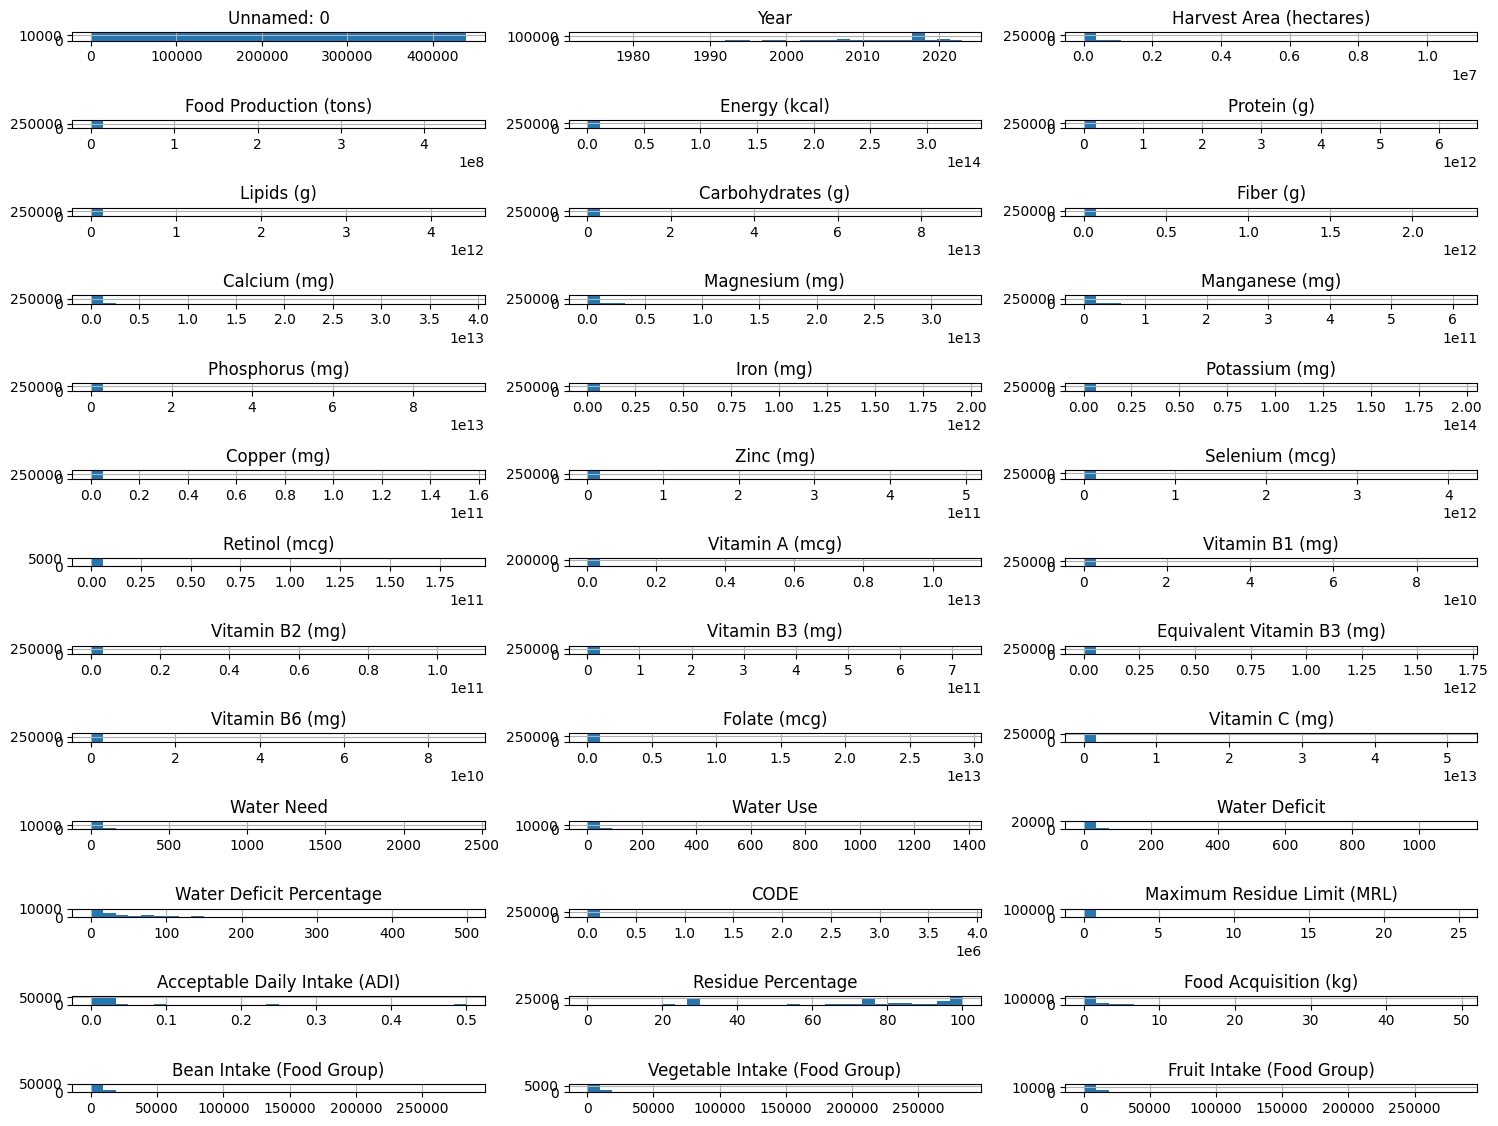

In [34]:
#Histograms for Numerical Features
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot histograms
df[num_cols].hist(bins=30, figsize=(15, 12), layout=(len(num_cols) // 3 + 1, 3))
plt.tight_layout()
plt.show()


In [35]:
# calculate skewness:
df[num_cols].skew().sort_values(ascending=False)



Vitamin C (mg)                   7.829986e+01
Carbohydrates (g)                2.452566e+01
Food Production (tons)           2.441444e+01
Energy (kcal)                    2.002911e+01
Retinol (mcg)                    1.384492e+01
Manganese (mg)                   1.124209e+01
Iron (mg)                        1.092795e+01
Protein (g)                      1.073528e+01
Copper (mg)                      1.058180e+01
Calcium (mg)                     1.043620e+01
Vitamin B2 (mg)                  9.979853e+00
Potassium (mg)                   9.531206e+00
Phosphorus (mg)                  9.522764e+00
Vitamin B6 (mg)                  9.443084e+00
Magnesium (mg)                   9.276477e+00
Vitamin B3 (mg)                  8.785807e+00
Lipids (g)                       8.713113e+00
Zinc (mg)                        8.694591e+00
Selenium (mcg)                   8.655017e+00
Equivalent Vitamin B3 (mg)       8.555626e+00
Water Deficit                    8.183211e+00
Vitamin B1 (mg)                  8

In [36]:
#Drop Unnamed: 0 
df.drop(columns=['Unnamed: 0'], inplace=True)



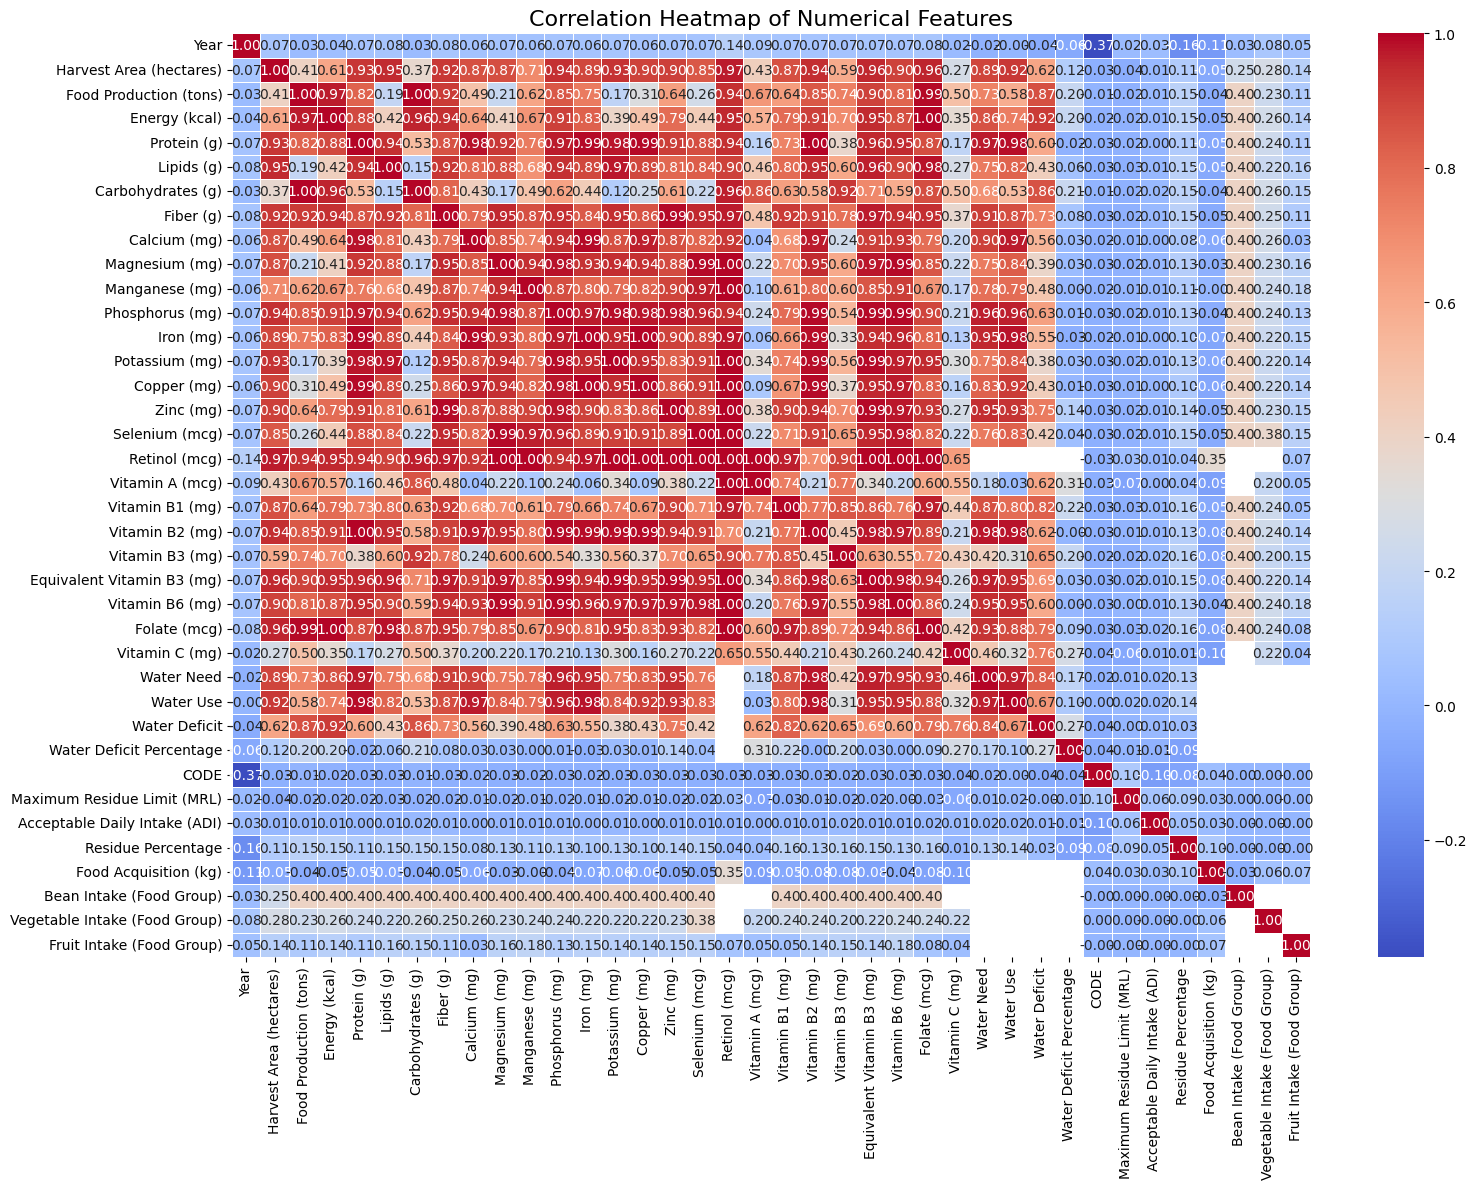

In [42]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


In [67]:
#Class balance
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
import pandas as pd

# Assuming you have a DataFrame `df` and want to balance the class distribution
# Example with your own data
X = df[[
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
]] # Example features
y = df["healthy"]  # Target variable

# Printing number of samples in each class before Under-Sampling
t = [(d) for d in y if d == 0]
s = [(d) for d in y if d == 1]
print('Before Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))

# Down-Sampling majority class
UnderS = RandomUnderSampler(random_state=42, replacement=True)

# Fit predictor (X) and target (y) using fit_resample()
X_Under, Y_Under = UnderS.fit_resample(X, y)

# Printing number of samples in each class after Under-Sampling
t = [(d) for d in Y_Under if d == 0]
s = [(d) for d in Y_Under if d == 1]
print('After Under-Sampling: ')
print('Samples in class 0: ', len(t))
print('Samples in class 1: ', len(s))


Before Under-Sampling: 
Samples in class 0:  321606
Samples in class 1:  117693
After Under-Sampling: 
Samples in class 0:  117693
Samples in class 1:  117693


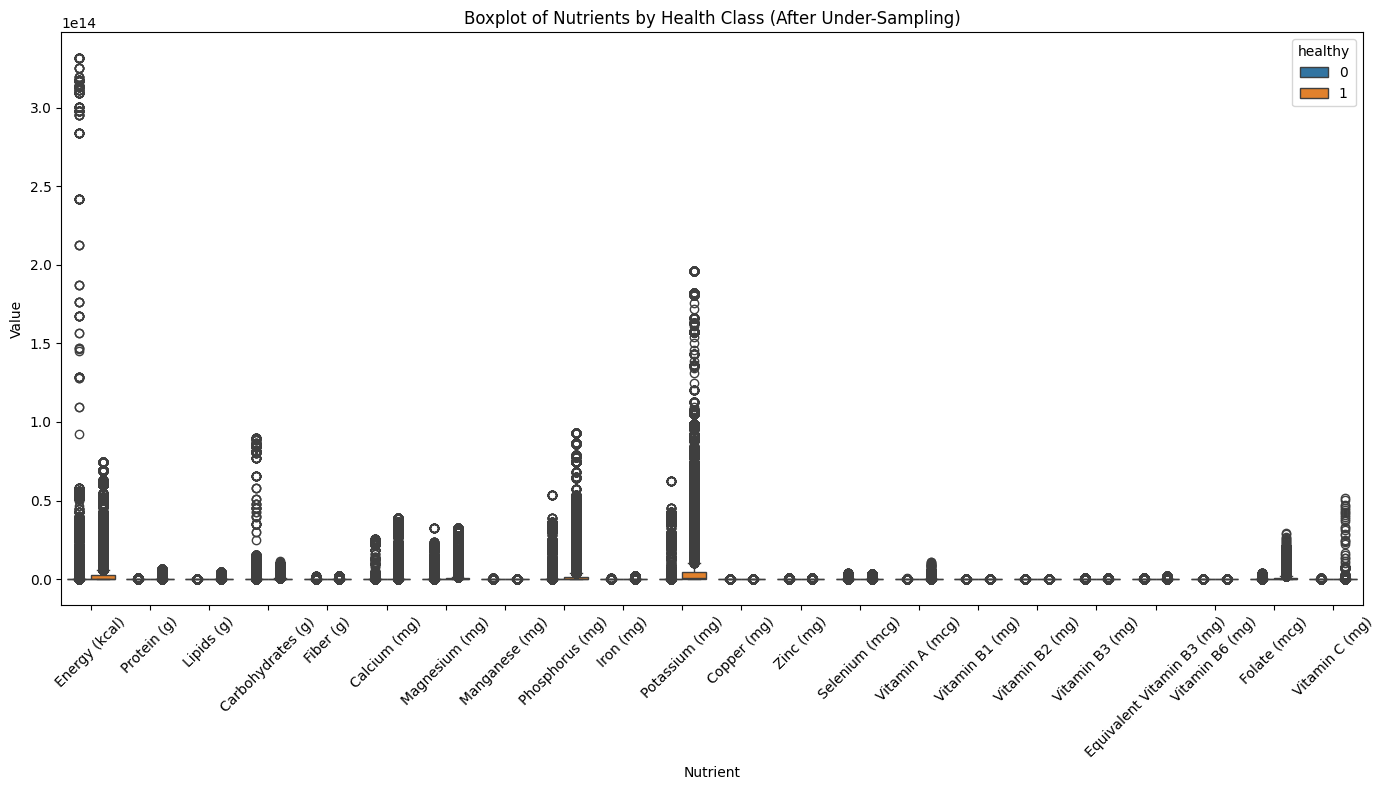

In [68]:
# boxplot of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_under and y_under are the under-sampled data and labels
# Create a new DataFrame with under-sampled data and combine features with labels
df_under = pd.DataFrame(X_Under, columns=[
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
])

df_under["healthy"] = Y_Under

# Melt the DataFrame for seaborn boxplot
df_melted = df_under.melt(id_vars="healthy", var_name="Nutrient", value_name="Value")

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x="Nutrient", y="Value", hue="healthy")
plt.title("Boxplot of Nutrients by Health Class (After Under-Sampling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [81]:
#check for missing values
import pandas as pd

# Assuming df is your DataFrame

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Now we handle the missing values
# Fill missing values in numerical columns with mean (for normally distributed data) or median (for skewed data)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values for numerical columns with median (you can also use mean, depending on your data)
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check again for any remaining missing values
missing_values_after = df.isnull().sum()
print("\nMissing values after filling:\n", missing_values_after)



Missing values in each column:
 Energy (kcal)                    0
Protein (g)                      0
Lipids (g)                       0
Carbohydrates (g)                0
Fiber (g)                        0
Calcium (mg)                     0
Magnesium (mg)                   0
Manganese (mg)                   0
Phosphorus (mg)                  0
Iron (mg)                        0
Potassium (mg)                   0
Copper (mg)                      0
Zinc (mg)                        0
Selenium (mcg)                   0
Retinol (mcg)                    0
Vitamin A (mcg)                  0
Vitamin B1 (mg)                  0
Vitamin B2 (mg)                  0
Vitamin B3 (mg)                  0
Equivalent Vitamin B3 (mg)       0
Vitamin B6 (mg)                  0
Folate (mcg)                     0
Vitamin C (mg)                   0
Water Need                       0
Water Use                        0
Water Deficit                    0
Water Deficit Percentage         0
Class                  

In [80]:
# Check for any missing values across the entire dataset
any_missing = df.isnull().values.any()
if any_missing:
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")



There are no missing values in the dataset.


In [89]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding only if categorical columns exist
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # ✅ Fixed parameter
    ],
    remainder='passthrough'
)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert back to DataFrame to retain column names
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print("✅ One-Hot Encoding Applied Successfully!")



✅ One-Hot Encoding Applied Successfully!


In [90]:
#Split the data into training + validation and test sets:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [91]:
#Then, split the 80% into training and validation sets (60% training, 20% validation):
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


In [ ]:
#Start of randomforest ensemble method
# Check the data split
print(f"Training data size: {X_train.shape[0]}")
print(f"Validation data size: {X_val.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")

Training data size: 263579
Validation data size: 87860
Test data size: 87860


In [92]:
# Define Features and Target
# List of features (nutritional values)
features = [
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
]

# The target column (healthy: 1 for healthy, 0 for unhealthy)
target = "healthy"

# Separate the features and target variable
X = df[features]  # Features (nutritional values)
y = df[target]    # Target variable (healthy or unhealthy)


In [ ]:
# Check the data split
print(f"Training data size: {X_train.shape[0]}")
print(f"Validation data size: {X_val.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")

Training data size: 263579
Validation data size: 87860
Test data size: 87860


In [95]:
#train the randomforest model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [96]:
#Make Predictions on the Validation Set
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Show the first few predicted values
print(y_val_pred[:10])  # Display the first 10 predictions



[0 0 0 1 0 1 1 1 0 0]


In [97]:
#Evaluate the Model’s Performance
# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 1.0000


In [98]:
#Evaluate on the Test Set: You should check the model’s performance on the test set (X_test) to see how it generalizes to unseen data
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9999


In [100]:
#Check the Classification Report
from sklearn.metrics import classification_report

# Print classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64391
           1       1.00      1.00      1.00     23469

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



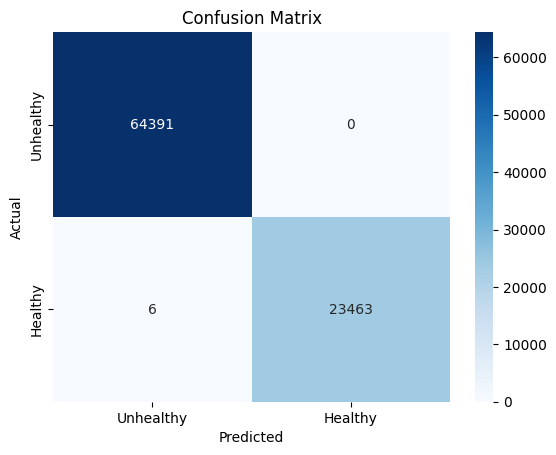

In [101]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [102]:
#Cross-validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")


Cross-validation scores: [0.99809925 0.99960164 1.         1.         0.99981789]
Mean cross-validation score: 0.9995037555608697


In [ ]:
#Initialize the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)


In [104]:
#Initialize and train the AdaBoost model
# Initialize the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [106]:
#Validate the model
from sklearn.metrics import accuracy_score

# Predict on validation set
y_val_pred = ada_model.predict(X_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")



Validation Accuracy: 0.9983


In [107]:
#test the adaboost model
# Predict on test set
y_test_pred = ada_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9985


In [108]:
#Classification report
from sklearn.metrics import classification_report

# Classification report on the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64391
           1       1.00      1.00      1.00     23469

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



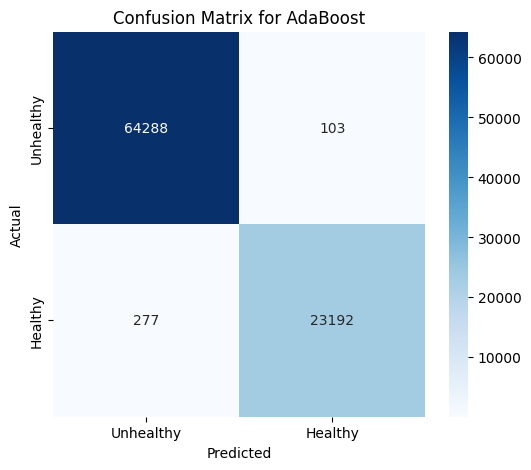

In [132]:
# Get predictions from AdaBoost
y_test_pred_ada = ada_model.predict(X_test)

# Generate the confusion matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_test_pred_ada)

# Plot the confusion matrix for AdaBoost
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()


In [ ]:
#Start of xgBoost and initialization
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [111]:
#Predict on the Validation Set
y_val_pred = xgb_model.predict(X_val)


In [112]:
# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Accuracy: 1.0000


In [113]:
# Generate classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64257
           1       1.00      1.00      1.00     23603

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



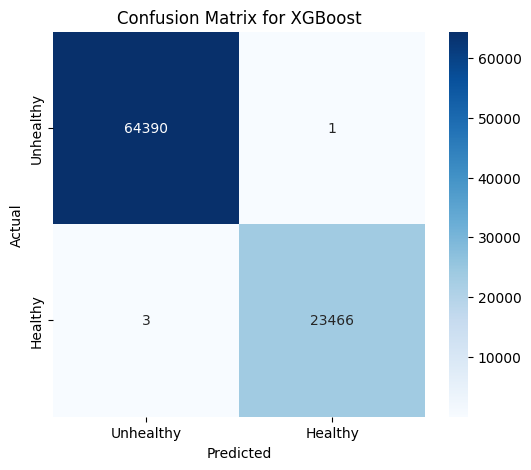

In [133]:
# Get predictions from XGBoost
y_test_pred_xgb = xgb_model.predict(X_test)

# Generate the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [ ]:
#Prepare the Dataset for soft votinh
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
# Split the data into training + validation and test sets (80% train + validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the 80% into training (60%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



In [122]:
#Initialize and Train the Individual Models
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [123]:
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)



AdaBoostClassifier(random_state=42)

In [124]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [125]:
# Evaluate Individual Models
rf_pred = rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))


Random Forest Accuracy: 0.9999772365126337
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64257
         1.0       1.00      1.00      1.00     23603

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [126]:
ada_pred = ada.predict(X_val)
print("AdaBoost Accuracy:", accuracy_score(y_val, ada_pred))
print(classification_report(y_val, ada_pred))


AdaBoost Accuracy: 0.995435920783064
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64257
         1.0       0.99      0.99      0.99     23603

    accuracy                           1.00     87860
   macro avg       1.00      0.99      0.99     87860
weighted avg       1.00      1.00      1.00     87860



In [127]:
xgb_pred = xgb.predict(X_val)
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_pred))
print(classification_report(y_val, xgb_pred))


XGBoost Accuracy: 0.9999886182563169
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64257
         1.0       1.00      1.00      1.00     23603

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [128]:
#Create the Soft Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf), ('ada', ada), ('xgb', xgb)], voting='soft')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [129]:
#Evaluate the Voting Classifier
voting_pred = voting_clf.predict(X_val)
print("Voting Classifier Accuracy:", accuracy_score(y_val, voting_pred))
print(classification_report(y_val, voting_pred))



Voting Classifier Accuracy: 0.9999886182563169
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64257
         1.0       1.00      1.00      1.00     23603

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [130]:
#Test the Model
test_pred = voting_clf.predict(X_test)
print("Voting Classifier Test Accuracy:", accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))


Voting Classifier Test Accuracy: 0.9999544730252675
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64391
         1.0       1.00      1.00      1.00     23469

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860



In [134]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)  # or y_test for test set
print(cm)


[[32131 32126]
 [11800 11803]]


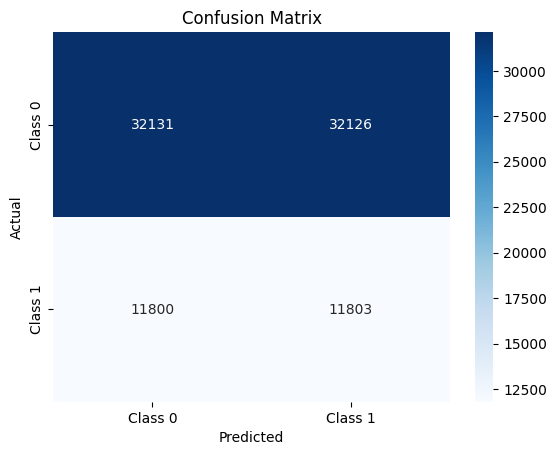

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Evaluate Individual Models
rf_pred = rf.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print(classification_report(y_val, rf_pred))


Random Forest Accuracy: 0.9999772365126337
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     64257
         1.0       1.00      1.00      1.00     23603

    accuracy                           1.00     87860
   macro avg       1.00      1.00      1.00     87860
weighted avg       1.00      1.00      1.00     87860

